In [22]:
import pandas as pd 
import numpy as np
import re, nltk
from numpy import array
from keras.preprocessing.text import one_hot 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [26]:
import pandas as pd
df1 = pd.read_csv(r'AllLanguages.csv', encoding ="utf-8")
df = df1.sample(frac =1)
display(df)

,sentence,AMH,Tigrinya,Lithaunian,Arabic,czech,Germany,French,Labels
5400,Im just happy Grayson Allens playing,ሁሉም የሚጫወቱትን ደስተኛ ግሪሰን ይመስሉ,ዘሐጕስ ግራሰን ኵልና ምጽዋት መሰሎ,Aš tiesiog laimingas Graysonas Allensas žaidžia,أنا فقط سعيد غرايسون ألنس يلعب,Jsem jen šťastný Grayson Allens hraní,"Ich bin nur glücklich, dass Grayson Allens spielt",Je suis juste heureux Grayson Allens jouer,2
1420,Thanks to Due Process this piece of trash has ...,ስንተኛን እንቀጣለን ፣ ስንተኛም ሞት የሚገባውን ቅጣት ያገኛል ብለን ተስ...,ሳላ እዚ መስርሕ ጉሓፍ እዚ ናይ ሞት መቕጻእቲ ዝግብኦ ነገር ኣብ ቀረባ ...,Dėl tinkamo proceso šis šiukšliadėžė turi pasi...,بفضل الإجراءات القانونية الواجبة ، فإن هذه الق...,Díky řádnému procesu má tento kus odpadku na v...,Dank des ordnungsgemäßen Verfahrens hat wir di...,"Grâce à la procédure régulière, cette poubelle...",0
372,No wonder Vladimir Putin hates Saakashvili Saa...,ቭላድሚር ፑቲን ሳካሽቪሊ ሳካሽቪሊ እያሉ መጥላታቸው አያስደንቅም ፤ ምክን...,ቭላድሚር ፑቲን ንሳካሽቪሊ ሳካሽቪሊ እንተ ጸልአ እምበኣር ፡ ቀንዲ ስሙ ...,Nenuostabu,لا عجب أن فلاديمير بوتين يكره ساكاشفيلي ساكاشف...,"Není divu, že Vladimir Putin Hates Saakashvili...","Kein Wunder, dass Vladimir Putin Saakashvili S...",Pas étonnant que Vladimir Poutine déteste Saak...,0
2031,HURRY then work on dismantling the electoral c...,ከዚያም ፈጥናችሁ የምርጫ ኮሌጁን 27 ሚሊዮን ጥፋት የሚያስፈልግ ዳይኖሶር...,ተቐላጢፍካ ነቲ ናይ ምርጫ ኮለጅ ነቲ ክሳዕ ሕጂ 27 ሚልዮን ዝጸነቱ ዳይ...,"Paskubėkite tada išardydami rinkimų kolegiją, ...",عجل ثم العمل على تفكيك الكلية الانتخابية ، إنه...,Pospěšte si a pracujte na demontáži volební šk...,"Beeilen Sie sich und arbeiten Sie dann daran, ...",Dépêchez-vous puis travaillez sur le démantèle...,0
6009,Velvet is in LuLaRoe has the more modest versi...,ቬልቬት በሉላአሮ በጣም አነስተኛ የሆነ ስሪት ቼክ ሉላሮአንተአላዊ,ቬሎ ኣብ ሉላራዮ እዩ ዝርከብ ፣ እቲ ዝያዳ ትሑት መጠን ዘለዎ ቸክ ዘ ሉ...,„Velvet“ yra „Lularoe“,Velvet في Lularoe لديه نسخة أكثر تواضعا تحقق م...,"Velvet je v lularoe má skromnější verzi, podív...",Velvet ist in Lularoe hat die bescheidenere Ve...,Velvet est en Lularoe a la version la plus mod...,2
...,...,...,...,...,...,...,...,...,...
2904,Dak Prescott Vs Tony Romo Pool Give Your Vote,ዳክ ፕሪስቶት ቪስ ሮሞ ፑል ድምፅዎን ይሰጣሉ,ዳክኮት ፕረስ ቪስ ቶኒ ሮሞ ፑል ድምጽኻ ሃቦ,Dak Prescott vs Tony Romo baseinas duok savo b...,Dak Prescott vs Tony Romo Pool أعط تصويتك,Dak Prescott vs Tony Romo Pool dávejte hlasování,Dak Prescott gegen Tony Romo Pool geben Ihre S...,Dak Prescott vs Tony Romo Pool Donnez votre vote,1
3972,Top 10 Countries with the Deadliest Roads News,ከፍተኛ 10 አገሮች ከሙት አስፋፊ መንገዶች ጋር,ልዕሊ 10 ሃገራት ፡ ቀታሊ ዝዀነ መገዲ ተጠቒመን,"10 geriausių šalių, turinčių mirtingiausias ke...",أفضل 10 دول مع أخبار الطرق الأكثر دموية,Top 10 zemí s nejsmrtelnějšími zprávami o siln...,Top 10 Länder mit den tödlichsten Straßennachr...,Top 10 des pays avec les nouvelles les plus me...,1
263,Presidentelect Trump could make big bucks from...,ፕሬዚዳንት ምርጫ ትራምፕ ከዳኮታ መዳረሻ Pip መስመር ላይ ትልልቅ ባልዲ...,ፕረሲደንትነት ትራምፕ ካብ ዳኮታ ኣክቲ ፒፕሊን ዓቢ ሰንኮፍ ክገብር ይኽእ...,„Presidentelect Trump“ galėtų uždirbti dideliu...,يمكن للرئيس ترامب أن يصنع باكز كبيرة من تقارير...,PresidentElect Trump by mohl vydělat velké pen...,PresidentLect Trump könnte viel Geld aus Dakot...,PrésidentElect Trump pourrait faire de gros do...,0
5444,Spurs GoSpursGo 1997 SP Authentic 128 Tim Dunc...,ስፐርስጎ 1997 Sector 128 ቲም ዶንሰን RC RXS BGS 95 ቲም...,"ስፐርግስጎ 1997 ስፐርግስጎ ስፕረዝግኒ ፡ ""ኦንሆፍ ቸንተም ሪቻን ሪቻን...",„Spurs Gospursgo 1997 SP Autentic 128“ Tim Dun...,Spurs GoSpursgo 1997 SP Authentic 128 Tim Dunc...,Spurs Gospursgo 1997 SP Authentic 128 Tim Dunc...,Spurs Gospursgo 1997 SP Authentic 128 Tim Dunc...,Spurs Gospursgo 1997 Sp Authentic 128 Tim Dunc...,2


In [27]:
sentence = df.AMH.values.tolist()
sentiment= df.Labels.values.tolist()
print(len(sentence))
print(len(sentiment))

7036
7036


In [28]:
sentrp = sentence[0:5628]
sentsp = sentence[5628:7036]
semtr = sentiment[0:5628]
semts = sentiment[5628:7036]
print(len(sentrp))
print(len(sentsp))
print(len(semtr))
print(len(semts))


5628
1408
5628
1408


In [29]:
print(sentrp[0:10])
print(sentsp[0:10])
print(semtr[0:10])
print(semts[0:10])

['ሁሉም የሚጫወቱትን ደስተኛ ግሪሰን ይመስሉ', 'ስንተኛን እንቀጣለን ፣ ስንተኛም ሞት የሚገባውን ቅጣት ያገኛል ብለን ተስፋ እናደርጋለን ፡ ፡', 'ቭላድሚር ፑቲን ሳካሽቪሊ ሳካሽቪሊ እያሉ መጥላታቸው አያስደንቅም ፤ ምክንያቱም መካከለኛ ስም ያላቸው ፑቲኖች ምግባረ ብልሹ መሆን አለባቸው ።', 'ከዚያም ፈጥናችሁ የምርጫ ኮሌጁን 27 ሚሊዮን ጥፋት የሚያስፈልግ ዳይኖሶር ዝርያውን በመበተን ስራ ላይ አውሉ', 'ቬልቬት በሉላአሮ በጣም አነስተኛ የሆነ ስሪት ቼክ ሉላሮአንተአላዊ', 'ሠራተኞቻችን ብሔራዊ ሥርዓተ ቀብር ሳይፈጽሙ እስከሄዱ ድረስ መወራረድ ትችላላችሁ', 'ሪክ ማርቲን ሻክ ጉርሻህን ያጠለቅሉ ሁለተኛ እንስሳት ትርምስ', 'ምስጋና እና ካትሪና ከተመሰገኑበት ቀን ጀምሮ ነጻነቱ ተጠብቆ የ xማስ ሙዚቃን እግዚአብሔር ይደግፈናል', 'የ HTC ቪድ አር ራስጌን እና ጎግል ምድር ቪአርን ስዕል ሞክሬ ነበር ፣ ከዛ አለም ለመውጣት እስክመኝ ድረስ በቲልት ብሩሽ ቅዱስ ካውን መጠቀም', 'ይህን የምስጋና ስጦታ በማበርከት ለመልካም ሆድዎቼ ሁሉ አመሰግናለሁ']
['የምርጫ ኮሌጁ ወይም እምነት የለሽ የምርጫ ኮሌጁ ተመራጮች ይህችን ፕላኔት ከጥፋት የሚያድን ማንኛውንም ነገር እንዲሽሩ ማድረግ', 'ራስፕ ከፕሮቴስታንት ምድር የእስራኤል ቅኝ ግዛት ሳይገጥማቸው በስትሮክ መስክ ላይ ተወርረዱ', 'ሞገዶቹ ዕድገት ሲፈሩ እኔ ፍቅር እንዳለኝ ተስማማሁ', 'የተጠለሉ ቅርጸ ቁምፊ እንክብካቤ', '4 ላንግ 3 ሎጋን 2 ሉቃስ 1 ስኪሊጂሎርጂሎፕ4 የቡድን መሪ', 'ታንክስጊቪንግ የተባሉትን መጥፎ ሆርሞኖች አሳይተዋል?', 'የቀድሞው ስዊዘርላንዳዊ ዘብ እና ነጋዴ ሊቀ ጳጳስ ፍራንሲስ በድሃው መስክ መዋዕለ ንዋያቸውን የሚያፈሱ ስራ ፈጣሪ ናቸው ብለዋል', 'ዛሬውኑ አቁም', 'ፈጣን እንቅስቃሴ

In [30]:
import numpy as np 
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
model = SentenceTransformer('sentence-transformers/LaBSE')
embeddingtr = model.encode(sentrp, batch_size = 128, convert_to_numpy = True, show_progress_bar = True)
embeddingts = model.encode(sentsp, batch_size = 128, convert_to_numpy = True, show_progress_bar = True)

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
frames = []
for idx, val in enumerate(sentsp):
    cos_va = cosine_similarity(embeddingts, embeddingtr)[idx]
    df1 = pd.DataFrame(sentrp, columns =['sentenc'])
    df1['position'] = df1.index.values
    
    df1['realsem'] = semts[idx]
    df1['new_cosine'] = (cos_va)
    query_sentence_cosine_df1 = df1.sort_values('new_cosine', ascending = False)
    df2 = query_sentence_cosine_df1[['sentenc', 'new_cosine','position','realsem']].head(3)
    frames.append(df2)
    result = pd.concat(frames)
display(result)

,sentenc,new_cosine,position,realsem
1253,ፋክቱን ከአገር አውጣ ወይም የማትፈልገውን ወይም ለዚያ ነገር አስፈላጊ ያ...,0.486079,1253,0
3744,ምርጫ ኮሌጁ እምነት የለሽ የምርጫ አስተላላፊዎችን መምረጥ ያለበት ለምንድ...,0.470239,3744,0
4400,ነፃ አውጪዎች የሕዝብ ምርጫ እስኪኖራቸው ድረስም ይህንኑ ያረጋግጣሉ,0.467463,4400,0
2219,ፍልስጤማዊያንን በሹፋት ፍተሻ ጣቢያ አቅራቢያ የእስራኤል ኃይሎች በፍልስጤ...,0.483420,2219,1
2300,በሾአፋት ምስራቅ ኢየሩሳሌም በፍልስጤም ኢራኤል ላይ በተከፈተ ጥቃት የመው...,0.476781,2300,1
...,...,...,...,...
420,ስፐርስጎ ታይምስ ዲ ኤን ሲ 199798 BOWANSE RCI 106 ተሸከርካ...,0.678336,420,2
5166,ስፐርስጎ እ.ኤ.አ. 199798 ቶፕስ ሮኬይኬ ከቲም ዱኤንካ 115 ሳን አ...,0.663233,5166,2
4036,የጣልያን ሪፈረንደም ሊ ፔን ሌሎች የአውሮፓ መሪዎች ትራምፕን አይቀበሉም,0.493440,4036,1
1459,የፍራንሲስ ማሪን ሌ ፔን ውጤቱ ጣሊያኖች የኢትየጵያ ብሬክሲት ዋክዩፑን ው...,0.491234,1459,1


In [33]:
for i in result['position']:
    result['pred'][i]= semtr[i]
display(result)

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppD

C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]
C:\Users\senug\AppData\Local\Temp/ipykernel_14600/385415318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred'][i]= semtr[i]


,sentenc,new_cosine,position,realsem,pred
1253,ፋክቱን ከአገር አውጣ ወይም የማትፈልገውን ወይም ለዚያ ነገር አስፈላጊ ያ...,0.486079,1253,0,0
3744,ምርጫ ኮሌጁ እምነት የለሽ የምርጫ አስተላላፊዎችን መምረጥ ያለበት ለምንድ...,0.470239,3744,0,2
4400,ነፃ አውጪዎች የሕዝብ ምርጫ እስኪኖራቸው ድረስም ይህንኑ ያረጋግጣሉ,0.467463,4400,0,0
2219,ፍልስጤማዊያንን በሹፋት ፍተሻ ጣቢያ አቅራቢያ የእስራኤል ኃይሎች በፍልስጤ...,0.483420,2219,1,1
2300,በሾአፋት ምስራቅ ኢየሩሳሌም በፍልስጤም ኢራኤል ላይ በተከፈተ ጥቃት የመው...,0.476781,2300,1,1
...,...,...,...,...,...
420,ስፐርስጎ ታይምስ ዲ ኤን ሲ 199798 BOWANSE RCI 106 ተሸከርካ...,0.678336,420,2,2
5166,ስፐርስጎ እ.ኤ.አ. 199798 ቶፕስ ሮኬይኬ ከቲም ዱኤንካ 115 ሳን አ...,0.663233,5166,2,2
4036,የጣልያን ሪፈረንደም ሊ ፔን ሌሎች የአውሮፓ መሪዎች ትራምፕን አይቀበሉም,0.493440,4036,1,1
1459,የፍራንሲስ ማሪን ሌ ፔን ውጤቱ ጣሊያኖች የኢትየጵያ ብሬክሲት ዋክዩፑን ው...,0.491234,1459,1,0


In [34]:
import numpy
Grp = []
subs = []
result['pred']
for i in result['pred']:
    Grp.append(i)
#print(Grp)
print(len(Grp))
print(type(Grp))
splits = np.array_split(Grp,len(sentsp))# no of testing sets
vote = []
for array in splits:
    vote.append(list(array))
print(vote)
gr = []
for el in vote:
    mx = max(set(el), key =el.count)
    gr.append(mx)
    
print(gr)
print(type(gr))
print(len(gr))

4224
<class 'list'>
[[0, 2, 0], [1, 1, 1], [2, 2, 2], [2, 1, 1], [1, 1, 2], [2, 1, 1], [0, 1, 1], [1, 2, 2], [0, 2, 1], [2, 2, 1], [2, 2, 1], [1, 1, 1], [1, 1, 2], [1, 1, 2], [0, 2, 2], [1, 1, 0], [1, 0, 0], [1, 0, 0], [1, 1, 1], [1, 1, 1], [0, 2, 2], [1, 1, 0], [0, 1, 2], [1, 0, 0], [1, 1, 0], [0, 2, 1], [0, 1, 1], [2, 2, 2], [2, 2, 1], [0, 2, 1], [2, 2, 2], [2, 0, 0], [2, 2, 2], [0, 0, 0], [0, 0, 1], [2, 0, 2], [0, 0, 2], [2, 2, 2], [0, 2, 1], [0, 2, 0], [1, 0, 1], [0, 0, 1], [2, 1, 2], [2, 2, 2], [2, 2, 2], [1, 2, 0], [2, 2, 2], [2, 2, 2], [2, 2, 2], [1, 1, 0], [1, 0, 1], [0, 1, 0], [2, 0, 2], [2, 2, 2], [0, 1, 0], [2, 1, 1], [2, 0, 1], [0, 0, 0], [1, 1, 0], [1, 2, 1], [2, 2, 2], [0, 2, 2], [1, 1, 2], [0, 0, 0], [2, 2, 1], [1, 2, 1], [2, 1, 1], [2, 2, 2], [0, 2, 2], [0, 1, 1], [2, 2, 2], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 1, 2], [2, 2, 2], [1, 2, 1], [2, 2, 2], [2, 1, 2], [2, 0, 0], [1, 1, 1], [2, 1, 2], [0, 0, 0], [2, 2, 2], [2, 1, 2], [1, 1, 0], [0, 2, 0], [1, 0, 1], [1, 0, 0], 

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
Fram = []
for idx, val in enumerate(sentsp):
    cos_va = cosine_similarity(embeddingts, embeddingtr)[idx]
    
    df1 = pd.DataFrame(sentrp, columns =['sentenc'])
    df1['position'] = df1.index.values
    df1['realsem'] = semts[idx]
    df1['new_cosine'] = (cos_va)
    query_sentence_cosine_df1 = df1.sort_values('new_cosine', ascending = False)
    res = query_sentence_cosine_df1[['sentenc', 'new_cosine','position','realsem']].head(1)
    Fram.append(res)
    reslt1= pd.concat(Fram)
display(reslt1)

,sentenc,new_cosine,position,realsem
1253,ፋክቱን ከአገር አውጣ ወይም የማትፈልገውን ወይም ለዚያ ነገር አስፈላጊ ያ...,0.486079,1253,0
2219,ፍልስጤማዊያንን በሹፋት ፍተሻ ጣቢያ አቅራቢያ የእስራኤል ኃይሎች በፍልስጤ...,0.483420,2219,1
4965,ከዳዊት ብሌን ጋር እንደምወድ ይሰማኛል,0.512721,4965,2
1968,ለሕፃን ቅርፀ ቁምፊ እባክህ አከብራለሁ,0.334731,1968,0
146,ጊልሞርዥጎርዞፕ4 ለእርስዎ 1 ስኪ 2 ሎጋን3 ሉክ4 ግሌን,0.774189,146,1
...,...,...,...,...
5473,ስቲቭ ቦንዶች በመጀመሪያ ለፕሬዚዳንት ፖሊቺኮ መቀመጫዎቻችሁን ይይዛሉ,0.486321,5473,1
3752,እንደ ሰውዬው ገለፃ ጐብኝተው የመጡት 10 በጣም አስቸጋሪ አገሮች እያንዳ...,0.574970,3752,1
578,የዶናልድ ትራምፕ መመረጥ ሥልጣን ሲይዝ በዳኮታ መዳረሻ ፓፕሌይ ላይ ጉልህ...,0.701516,578,0
3088,ስፐርስጎ 1997 ዊስፐርስጎ 1997 የቲም ዶንሰን RC R ይ ሮኪ ካርድ ...,0.810318,3088,2


In [36]:
reslt1['predic']= gr
display(reslt1)

,sentenc,new_cosine,position,realsem,predic
1253,ፋክቱን ከአገር አውጣ ወይም የማትፈልገውን ወይም ለዚያ ነገር አስፈላጊ ያ...,0.486079,1253,0,0
2219,ፍልስጤማዊያንን በሹፋት ፍተሻ ጣቢያ አቅራቢያ የእስራኤል ኃይሎች በፍልስጤ...,0.483420,2219,1,1
4965,ከዳዊት ብሌን ጋር እንደምወድ ይሰማኛል,0.512721,4965,2,2
1968,ለሕፃን ቅርፀ ቁምፊ እባክህ አከብራለሁ,0.334731,1968,0,1
146,ጊልሞርዥጎርዞፕ4 ለእርስዎ 1 ስኪ 2 ሎጋን3 ሉክ4 ግሌን,0.774189,146,1,1
...,...,...,...,...,...
5473,ስቲቭ ቦንዶች በመጀመሪያ ለፕሬዚዳንት ፖሊቺኮ መቀመጫዎቻችሁን ይይዛሉ,0.486321,5473,1,2
3752,እንደ ሰውዬው ገለፃ ጐብኝተው የመጡት 10 በጣም አስቸጋሪ አገሮች እያንዳ...,0.574970,3752,1,1
578,የዶናልድ ትራምፕ መመረጥ ሥልጣን ሲይዝ በዳኮታ መዳረሻ ፓፕሌይ ላይ ጉልህ...,0.701516,578,0,1
3088,ስፐርስጎ 1997 ዊስፐርስጎ 1997 የቲም ዶንሰን RC R ይ ሮኪ ካርድ ...,0.810318,3088,2,2


In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(reslt1)

,sentenc,new_cosine,position,realsem,predic
1253,ፋክቱን ከአገር አውጣ ወይም የማትፈልገውን ወይም ለዚያ ነገር አስፈላጊ ያ...,0.486079,1253,0,0
2219,ፍልስጤማዊያንን በሹፋት ፍተሻ ጣቢያ አቅራቢያ የእስራኤል ኃይሎች በፍልስጤ...,0.483420,2219,1,1
4965,ከዳዊት ብሌን ጋር እንደምወድ ይሰማኛል,0.512721,4965,2,2
1968,ለሕፃን ቅርፀ ቁምፊ እባክህ አከብራለሁ,0.334731,1968,0,1
146,ጊልሞርዥጎርዞፕ4 ለእርስዎ 1 ስኪ 2 ሎጋን3 ሉክ4 ግሌን,0.774189,146,1,1
1945,ቲም ዶንጋን ካውን ያዘጋጀው ነገር አለ?,0.473738,1945,1,1
3057,ሊቀ ጳጳስ ቤኔዲክት መጀመሪያ ላይ ስለ ፍራንሲስ እርግጠኛ ያልነበሩ መሆና...,0.441828,3057,1,1
1092,ነገን ደንብ አወጣ,0.544111,1092,1,2
4640,የምዕራባዊ አይሲስ ጀብደኝነት እስራኤል ከሃማስ አሳንጅ መገለጥ ጀርባ እስ...,0.514947,4640,0,0
3300,መኪና ለማሽከርከር በሚሳፈርበት ጊዜ የምትሄድበትን ቦታ መደርደር አለብህን,0.591959,3300,1,2


In [38]:
import pandas as pd
true_class = reslt1["realsem"].to_numpy()
pred_class = reslt1["predic"].to_numpy()

In [39]:
print(pred_class)
print(true_class)

[0 1 2 ... 1 2 1]
[0 1 2 ... 0 2 1]


In [40]:
Accuracy = sum(np.array(pred_class)==np.array(true_class))/float(len(true_class))
print(Accuracy)

0.5262784090909091


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf_matrix = confusion_matrix(true_class, pred_class)
print(cf_matrix)

[[294 108  58]
 [167 159 130]
 [110  94 288]]


In [44]:
from sklearn import metrics
print(metrics.classification_report(true_class, pred_class))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       460
           1       0.44      0.35      0.39       456
           2       0.61      0.59      0.60       492

    accuracy                           0.53      1408
   macro avg       0.52      0.52      0.52      1408
weighted avg       0.52      0.53      0.52      1408



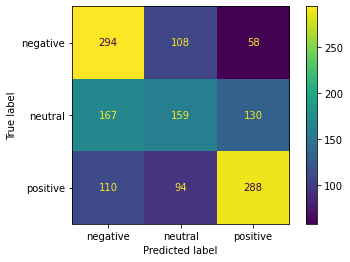

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_class, pred_class, normalize='all')
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['negative','neutral','positive'])
cmd.plot()